<a href="https://colab.research.google.com/github/ArminD93/WorldHappinessReport/blob/dev/WorldHappinessReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)


happiness2015 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2015.csv', low_memory=False)
happiness2016 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2016.csv', low_memory=False)
happiness2017 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2017.csv', low_memory=False)
happiness2018 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2018.csv', low_memory=False)
happiness2019 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2019.csv', low_memory=False)

happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [2]:
happiness2015.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 34.6 KB


In [3]:
happiness2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [4]:
happiness2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


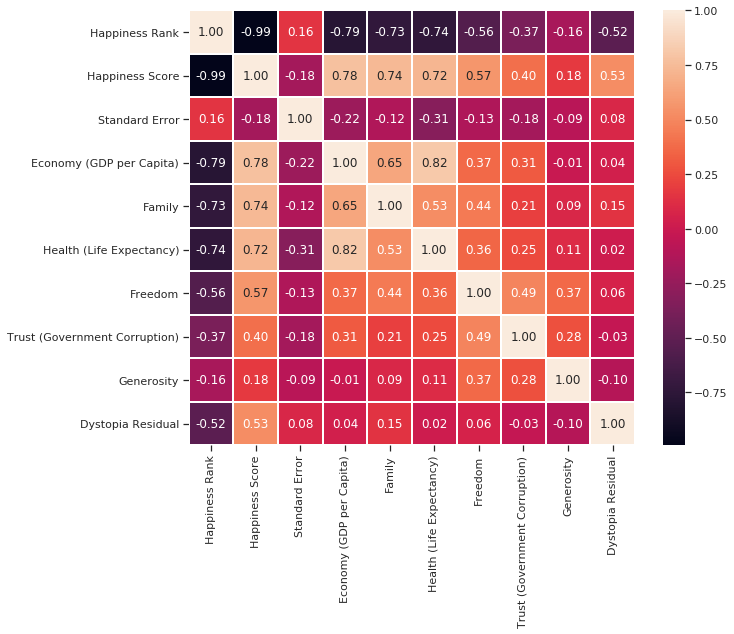

In [5]:
corr= happiness2015.corr()

fig = plt.figure(figsize=(10,8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt='.2f', linewidth=1)

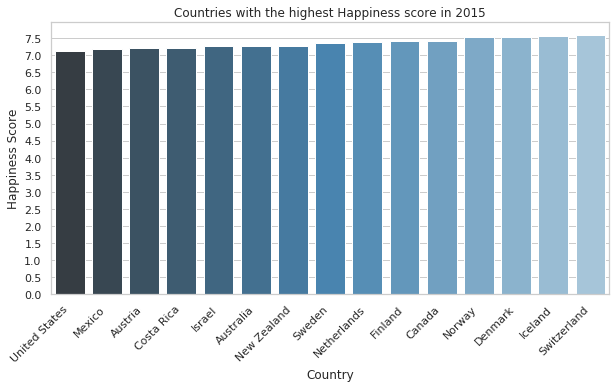

In [6]:
# Countries with the highest Happiness score in 2015
Sortedhappiness2015 = happiness2015.sort_values(by='Happiness Score')
Sortedhappiness2015Greaterthan7 = Sortedhappiness2015['Happiness Score'] >= 7
Sortedhappiness2015Greaterthan7 = Sortedhappiness2015[Sortedhappiness2015Greaterthan7]

x_data= 'Country'

sns.set_style('whitegrid') 
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0, 8, step=0.5))

g = sns.barplot(  data=Sortedhappiness2015Greaterthan7, x=x_data,  y='Happiness Score',palette='Blues_d'  )

g.set( xlabel='Country', ylabel='Happiness Score', title='Countries with the highest Happiness score in 2015')
g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )
plt.show()

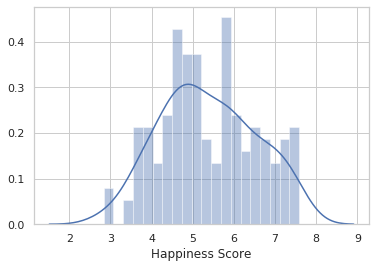

In [7]:
sns.distplot(happiness2015['Happiness Score'], bins=20 )

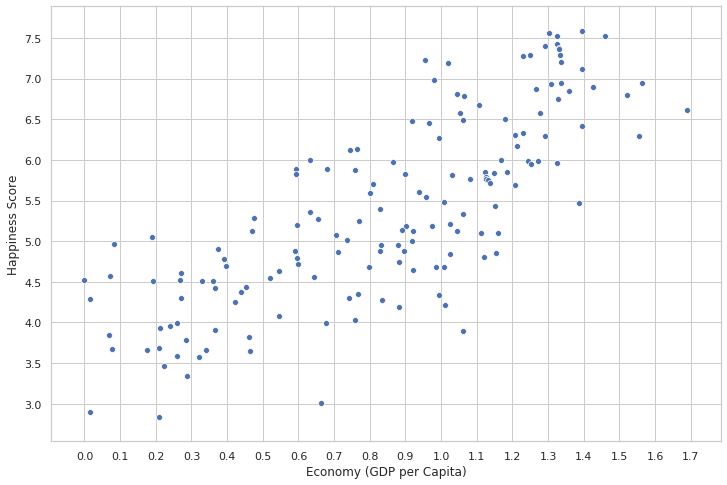

In [8]:
plt.figure(figsize=(12,8))
plt.yticks(np.arange(0, 8, step=0.5))
plt.xticks(np.arange(0, 1.8, step=0.1))
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=happiness2015)

In [0]:
happiness2015.reset_index()
# Choosing variable to be predicted
y = happiness2015['Happiness Score'].values.reshape(-1,1)

# feature included in model
X = happiness2015['Economy (GDP per Capita)'].values.reshape(-1,1)

In [0]:
# Split data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
# Train Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

# Predict Results
y_pred = lin_reg.predict(X_test)

print('PREDICTED VALUES (UNSCALED):\n {}'.format(y_pred[:5]))

PREDICTED VALUES (UNSCALED):
 [[4.0491001 ]
 [6.28299925]
 [5.41385101]
 [3.47751904]
 [3.86449493]]


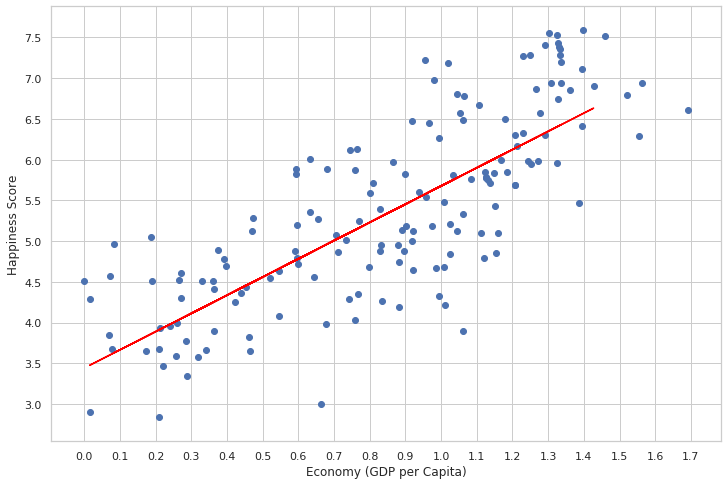

In [12]:
plt.figure(figsize=(12,8))
plt.yticks(np.arange(0, 8, step=0.5))
plt.xticks(np.arange(0, 1.8, step=0.1))

plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()

In [13]:
# Measure Accuracy
from sklearn.metrics import mean_squared_error
accuracy = mean_squared_error(y_test, y_pred) # Mean Squared Error
print('ACCURACY(MSE):\n{}%'.format(np.ceil(accuracy*100, )))

ACCURACY(MSE):
51.0%


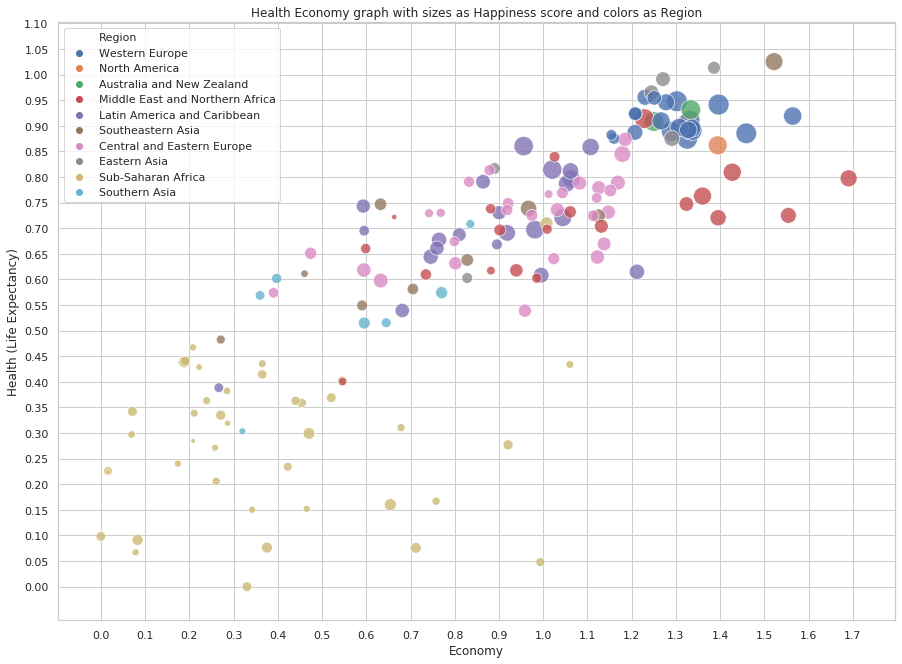

In [14]:
plt.figure(figsize=(15,11))
plt.yticks(np.arange(0, 1.5, step=0.05))
plt.xticks(np.arange(0, 1.8, step=0.1))
g = sns.scatterplot(x='Economy (GDP per Capita)', y='Health (Life Expectancy)', s=(happiness2015['Happiness Score']**3), hue='Region', data=happiness2015, alpha=0.8 )
g.set( xlabel='Economy', ylabel='Health (Life Expectancy)', title='Health Economy graph with sizes as Happiness score and colors as Region')
plt.show()